In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# import community
from networkx.algorithms import community


In [4]:
raw_data = pd.read_csv('all_data_raw.csv',index_col=0)
raw_data

,简称,日期,开盘价(元),收盘价(元),subsector
代码,,,,,
600030.SH,中信证券,2010-01-04,16.50,16.13,资本市场服务
600030.SH,中信证券,2010-01-05,16.26,16.92,资本市场服务
600030.SH,中信证券,2010-01-06,17.01,16.72,资本市场服务
600030.SH,中信证券,2010-01-07,16.71,16.32,资本市场服务
600030.SH,中信证券,2010-01-08,16.21,16.63,资本市场服务
...,...,...,...,...,...
000563.SZ,陕国投A,2021-01-13,3.59,3.51,其他金融业
000563.SZ,陕国投A,2021-01-14,3.49,3.51,其他金融业
000563.SZ,陕国投A,2021-01-15,3.51,3.52,其他金融业


In [5]:
raw_data['month'] = raw_data.apply(lambda x:x['日期'][:-3],axis=1)
raw_data['year'] = raw_data.apply(lambda x:x['日期'][:-6],axis=1)

In [6]:
raw_data['return'] = np.log(raw_data['收盘价(元)'])-np.log(raw_data['开盘价(元)'])

In [7]:
raw_data

,简称,日期,开盘价(元),收盘价(元),subsector,month,year,return
代码,,,,,,,,
600030.SH,中信证券,2010-01-04,16.50,16.13,资本市场服务,2010-01,2010,-0.022679
600030.SH,中信证券,2010-01-05,16.26,16.92,资本市场服务,2010-01,2010,0.039788
600030.SH,中信证券,2010-01-06,17.01,16.72,资本市场服务,2010-01,2010,-0.017196
600030.SH,中信证券,2010-01-07,16.71,16.32,资本市场服务,2010-01,2010,-0.023616
600030.SH,中信证券,2010-01-08,16.21,16.63,资本市场服务,2010-01,2010,0.025580
...,...,...,...,...,...,...,...,...
000563.SZ,陕国投A,2021-01-13,3.59,3.51,其他金融业,2021-01,2021,-0.022536
000563.SZ,陕国投A,2021-01-14,3.49,3.51,其他金融业,2021-01,2021,0.005714
000563.SZ,陕国投A,2021-01-15,3.51,3.52,其他金融业,2021-01,2021,0.002845


In [8]:
mutiIndex = list(zip(raw_data['month'],raw_data['简称']))
index = pd.MultiIndex.from_tuples(mutiIndex,names=['month','简称'])
raw_data.set_index(index)

简称          日期  开盘价(元)  收盘价(元) subsector    month  year  \
month   简称                                                                
2010-01 中信证券  中信证券  2010-01-04   16.50   16.13    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-05   16.26   16.92    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-06   17.01   16.72    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-07   16.71   16.32    资本市场服务  2010-01  2010   
        中信证券  中信证券  2010-01-08   16.21   16.63    资本市场服务  2010-01  2010   
...            ...         ...     ...     ...       ...      ...   ...   
2021-01 陕国投A  陕国投A  2021-01-13    3.59    3.51     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-14    3.49    3.51     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-15    3.51    3.52     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-18    3.50    3.54     其他金融业  2021-01  2021   
        陕国投A  陕国投A  2021-01-19    3.53    3.60     其他金融业  2021-01  2021   

                return  
month   简称              
2010-01 中信证券 -0.022679  
        中信证券  0.039788  
        中信证券 -0.017196  
        中信证券 -0.023616  
        中信证券  0.025580  
...                ...  
2021-01 陕国投A -0.022536  
        陕国投A  0.005714  
        陕国投A  0.002845  
        陕国投A  0.011364  
        陕国投A  0.019636  

[230203 rows x 8 columns]

In [58]:
one_month = raw_data[raw_data['month']=='2020-11']
one_month[one_month['简称']=='中信证券']

,简称,日期,开盘价(元),收盘价(元),subsector,month,year,return
代码,,,,,,,,
600030.SH,中信证券,2020-11-02,28.45,28.08,资本市场服务,2020-11,2020,-0.013091
600030.SH,中信证券,2020-11-03,28.27,28.73,资本市场服务,2020-11,2020,0.016141
600030.SH,中信证券,2020-11-04,28.73,28.73,资本市场服务,2020-11,2020,0.000000
600030.SH,中信证券,2020-11-05,29.37,29.19,资本市场服务,2020-11,2020,-0.006148
600030.SH,中信证券,2020-11-06,29.24,29.24,资本市场服务,2020-11,2020,0.000000
600030.SH,中信证券,2020-11-09,29.52,30.27,资本市场服务,2020-11,2020,0.025089
600030.SH,中信证券,2020-11-10,30.39,29.75,资本市场服务,2020-11,2020,-0.021284
600030.SH,中信证券,2020-11-11,29.68,29.26,资本市场服务,2020-11,2020,-0.014252
600030.SH,中信证券,2020-11-12,29.26,29.12,资本市场服务,2020-11,2020,-0.004796


In [59]:
pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
pivot_m

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
日期,,,,,,,,,,,,,,,,,,,,,
2020-11-02,-0.043485,0.043599,0.001276,-0.004107,-0.006459,0.003098,-0.018562,-0.004662,0.003834,-0.030384,...,0.006417,-0.008299,-0.009527,0.000000,0.015687,-0.010050,0.002821,-0.008547,-0.042302,0.000614
2020-11-03,0.034094,-0.032509,0.002545,0.030772,0.027544,0.022336,0.018519,0.032880,0.028806,0.035591,...,-0.008529,0.005525,0.033216,0.020652,0.066316,0.007791,0.025036,0.025425,0.006154,0.027200
2020-11-04,-0.034289,-0.014110,-0.007614,0.001599,-0.007334,-0.011106,-0.002291,0.002694,-0.003298,0.003041,...,-0.004237,-0.005510,-0.006413,-0.003945,-0.007398,-0.004410,-0.013793,-0.004149,-0.006129,0.001788
2020-11-05,0.005797,0.010582,0.001270,0.004732,0.003123,-0.001003,-0.004566,0.006181,0.009250,0.000918,...,-0.006349,0.002743,-0.004945,-0.001564,0.001222,-0.014341,0.008230,-0.002073,-0.006116,-0.007708
2020-11-06,-0.053425,0.051381,0.000000,-0.008665,-0.004158,-0.001002,-0.002291,0.009645,0.009970,-0.009918,...,0.010515,0.000000,-0.004977,0.000000,0.007299,-0.011173,-0.002736,-0.004149,-0.004098,-0.014354
2020-11-09,-0.012658,0.031802,0.008844,0.028651,0.022519,0.019647,0.029248,0.018901,0.058120,0.043095,...,-0.004193,0.008208,0.026030,0.021391,0.025106,0.012256,0.021622,0.020535,0.012245,0.013638
2020-11-10,0.000000,0.037433,-0.007538,-0.012251,-0.020409,-0.013672,-0.022223,-0.018065,-0.012298,-0.030995,...,0.002094,-0.008186,-0.024606,-0.019803,-0.002356,-0.006637,-0.010782,-0.020451,-0.006079,-0.022633
2020-11-11,-0.046831,0.029900,0.010127,-0.014827,-0.011405,-0.015952,-0.004505,-0.010435,-0.045462,-0.021217,...,0.010406,0.008208,-0.017229,-0.005428,-0.005963,0.001113,-0.005450,0.000000,0.008130,-0.017571
2020-11-12,0.074611,-0.023717,-0.002538,-0.006270,-0.005238,-0.008056,-0.027151,-0.001751,-0.000786,-0.007159,...,-0.004149,-0.002743,-0.000725,-0.021606,0.017637,-0.010062,-0.008230,-0.012579,-0.006116,-0.001227


In [60]:
corr=pivot_m.corr()
corr

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
简称,,,,,,,,,,,,,,,,,,,,,
*ST安信,1.000000,-0.529319,-0.166459,0.174728,0.203564,0.095757,-0.042747,0.048334,0.204278,0.144743,...,-0.368921,-0.053933,0.313656,-0.026887,0.138934,0.039062,0.012013,-0.025107,0.224824,0.520664
*ST熊猫,-0.529319,1.000000,-0.174182,-0.357083,-0.353855,-0.194454,-0.213988,-0.170785,-0.145729,-0.328503,...,-0.063606,-0.351763,-0.447048,-0.133712,-0.287057,-0.420178,-0.214315,-0.352986,-0.469683,-0.477461
上海银行,-0.166459,-0.174182,1.000000,0.604755,0.668968,0.613344,0.394798,0.569385,0.359706,0.544315,...,0.529469,0.888416,0.494955,0.628244,0.571946,0.711632,0.740639,0.772342,0.431924,0.192764
东兴证券,0.174728,-0.357083,0.604755,1.000000,0.940288,0.910511,0.623471,0.866220,0.805761,0.871696,...,0.028232,0.669671,0.859025,0.869468,0.798451,0.631952,0.869238,0.824017,0.450380,0.605717
东北证券,0.203564,-0.353855,0.668968,0.940288,1.000000,0.861613,0.672135,0.862775,0.708189,0.816591,...,0.119086,0.698521,0.828557,0.839712,0.767547,0.637926,0.850155,0.845357,0.405553,0.572182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
长沙银行,0.039062,-0.420178,0.711632,0.631952,0.637926,0.644292,0.519900,0.457540,0.512684,0.620221,...,0.430815,0.721718,0.679693,0.654940,0.479694,1.000000,0.661335,0.746363,0.670117,0.358997
陕国投A,0.012013,-0.214315,0.740639,0.869238,0.850155,0.925558,0.580013,0.763385,0.723887,0.844618,...,0.186764,0.709852,0.815438,0.798095,0.793108,0.661335,1.000000,0.859010,0.378132,0.480846
青农商行,-0.025107,-0.352986,0.772342,0.824017,0.845357,0.791282,0.547462,0.724082,0.570486,0.828021,...,0.345573,0.824839,0.732022,0.746697,0.791223,0.746363,0.859010,1.000000,0.520754,0.376398


In [61]:
print(sum(np.sum(corr.isna())))

0


In [62]:
distance_m = np.sqrt(2*(1-corr))
distance_m

简称,*ST安信,*ST熊猫,上海银行,东兴证券,东北证券,东吴证券,东方能源,东方证券,东方财富,中信建投,...,邮储银行,郑州银行,锦龙股份,长城证券,长江证券,长沙银行,陕国投A,青农商行,青岛银行,鲁信创投
简称,,,,,,,,,,,,,,,,,,,,,
*ST安信,0.000000,1.748896,1.527390,1.284735,1.262090,1.344800,1.444124,1.379613,1.261524,1.307867,...,1.654643,1.451850,1.171617,1.433099,1.312300,1.386318,1.405694,1.431857,1.245132,0.979118
*ST熊猫,1.748896,0.000000,1.532437,1.647473,1.645512,1.545609,1.558196,1.530219,1.513756,1.630033,...,1.458497,1.644240,1.701204,1.505797,1.604405,1.685336,1.558406,1.644984,1.714458,1.718988
上海银行,1.527390,1.532437,0.000000,0.889095,0.813674,0.879381,1.100184,0.928024,1.131630,0.954657,...,0.970084,0.472407,1.005032,0.862271,0.925261,0.759432,0.720223,0.674771,1.065904,1.270619
东兴证券,1.284735,1.647473,0.889095,0.000000,0.345578,0.423057,0.867790,0.517262,0.623280,0.506565,...,1.394107,0.812808,0.530989,0.510945,0.634900,0.857961,0.511395,0.593268,1.048447,0.888013
东北证券,1.262090,1.645512,0.813674,0.345578,0.000000,0.526093,0.809772,0.523880,0.763951,0.605655,...,1.327339,0.776504,0.585565,0.566194,0.681841,0.850969,0.547440,0.556135,1.090364,0.925006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
长沙银行,1.386318,1.685336,0.759432,0.857961,0.850969,0.843454,0.979898,1.041595,0.987235,0.871526,...,1.066944,0.746032,0.800383,0.830735,1.020104,0.000000,0.823001,0.712232,0.812260,1.132257
陕国投A,1.405694,1.558406,0.720223,0.511395,0.547440,0.385854,0.916501,0.687918,0.743118,0.557463,...,1.275332,0.761771,0.607555,0.635461,0.643260,0.823001,0.000000,0.531019,1.115229,1.018974
青农商行,1.431857,1.644984,0.674771,0.593268,0.556135,0.646093,0.951355,0.742857,0.926837,0.586479,...,1.144051,0.591881,0.732090,0.711763,0.646184,0.712232,0.531019,0.000000,0.979026,1.116783


In [63]:
zipped = []
for i in range(len(distance_m.columns)):
    zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
List_flat = []
for i in zipped:
    for j in i:
        List_flat.append(j)
s_List_flat = list(set(List_flat))
G = nx.Graph()
for i in range(len(distance_m.columns)):
    G.add_node(distance_m.columns[i])
G.add_weighted_edges_from(s_List_flat)

In [64]:
mst = nx.minimum_spanning_tree(G=G)

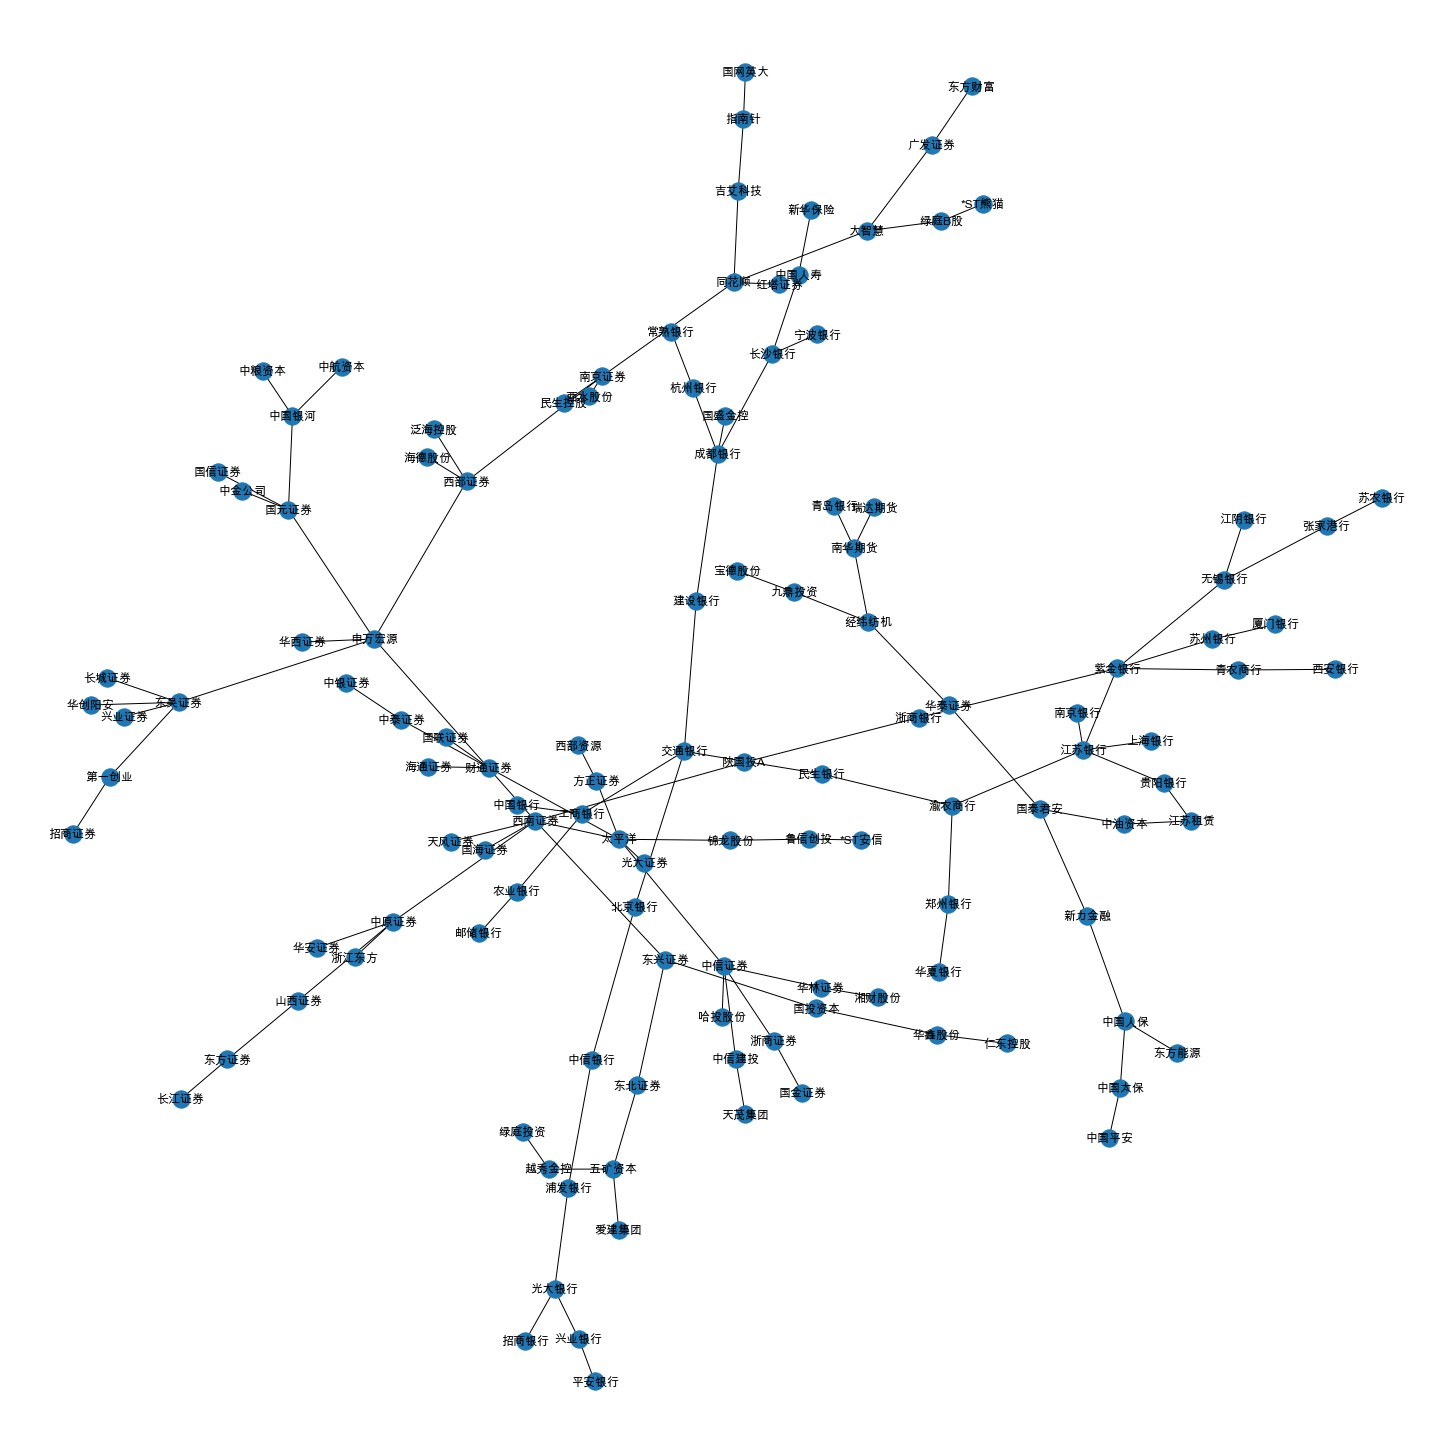

In [65]:
plt.figure(figsize=(20,20))

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_spring(mst,with_labels=True,)

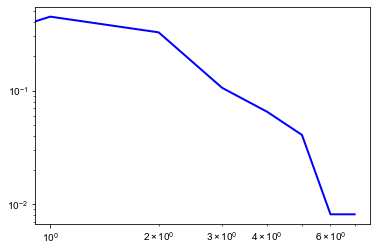

In [66]:
degree =  nx.degree_histogram(mst)          
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree] 
plt.loglog(x,y,color="blue",linewidth=2)          
plt.show()                                                          

In [67]:
communities_generator = community.girvan_newman(mst)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
color_c = sorted(map(sorted, next_level_communities))
color_c

[['*ST安信',
  '东兴证券',
  '东北证券',
  '东方证券',
  '中信建投',
  '中信证券',
  '中原证券',
  '中泰证券',
  '中银证券',
  '五矿资本',
  '仁东控股',
  '光大证券',
  '华安证券',
  '华林证券',
  '华鑫股份',
  '哈投股份',
  '国投资本',
  '国海证券',
  '国联证券',
  '国金证券',
  '天茂集团',
  '天风证券',
  '太平洋',
  '山西证券',
  '方正证券',
  '浙商证券',
  '浙江东方',
  '海通证券',
  '湘财股份',
  '爱建集团',
  '绿庭投资',
  '西南证券',
  '西部资源',
  '财通证券',
  '越秀金控',
  '锦龙股份',
  '长江证券',
  '鲁信创投'],
 ['*ST熊猫',
  '东吴证券',
  '东方财富',
  '中国银河',
  '中粮资本',
  '中航资本',
  '中金公司',
  '兴业证券',
  '华创阳安',
  '华西证券',
  '南京证券',
  '吉艾科技',
  '同花顺',
  '国信证券',
  '国元证券',
  '国网英大',
  '大智慧',
  '广发证券',
  '招商证券',
  '指南针',
  '民生控股',
  '泛海控股',
  '海德股份',
  '申万宏源',
  '第一创业',
  '红塔证券',
  '绿庭B股',
  '西水股份',
  '西部证券',
  '长城证券'],
 ['上海银行',
  '东方能源',
  '中信银行',
  '中国人保',
  '中国人寿',
  '中国太保',
  '中国平安',
  '中国银行',
  '中油资本',
  '九鼎投资',
  '交通银行',
  '光大银行',
  '兴业银行',
  '农业银行',
  '北京银行',
  '华夏银行',
  '华泰证券',
  '南京银行',
  '南华期货',
  '厦门银行',
  '国泰君安',
  '国盛金控',
  '宁波银行',
  '宝德股份',
  '工商银行',
  '常熟银行',
  '平安银行',
  '建设银行',
  '张家港行',
  '成都银行',
  '招商银行',
  '新力金融',


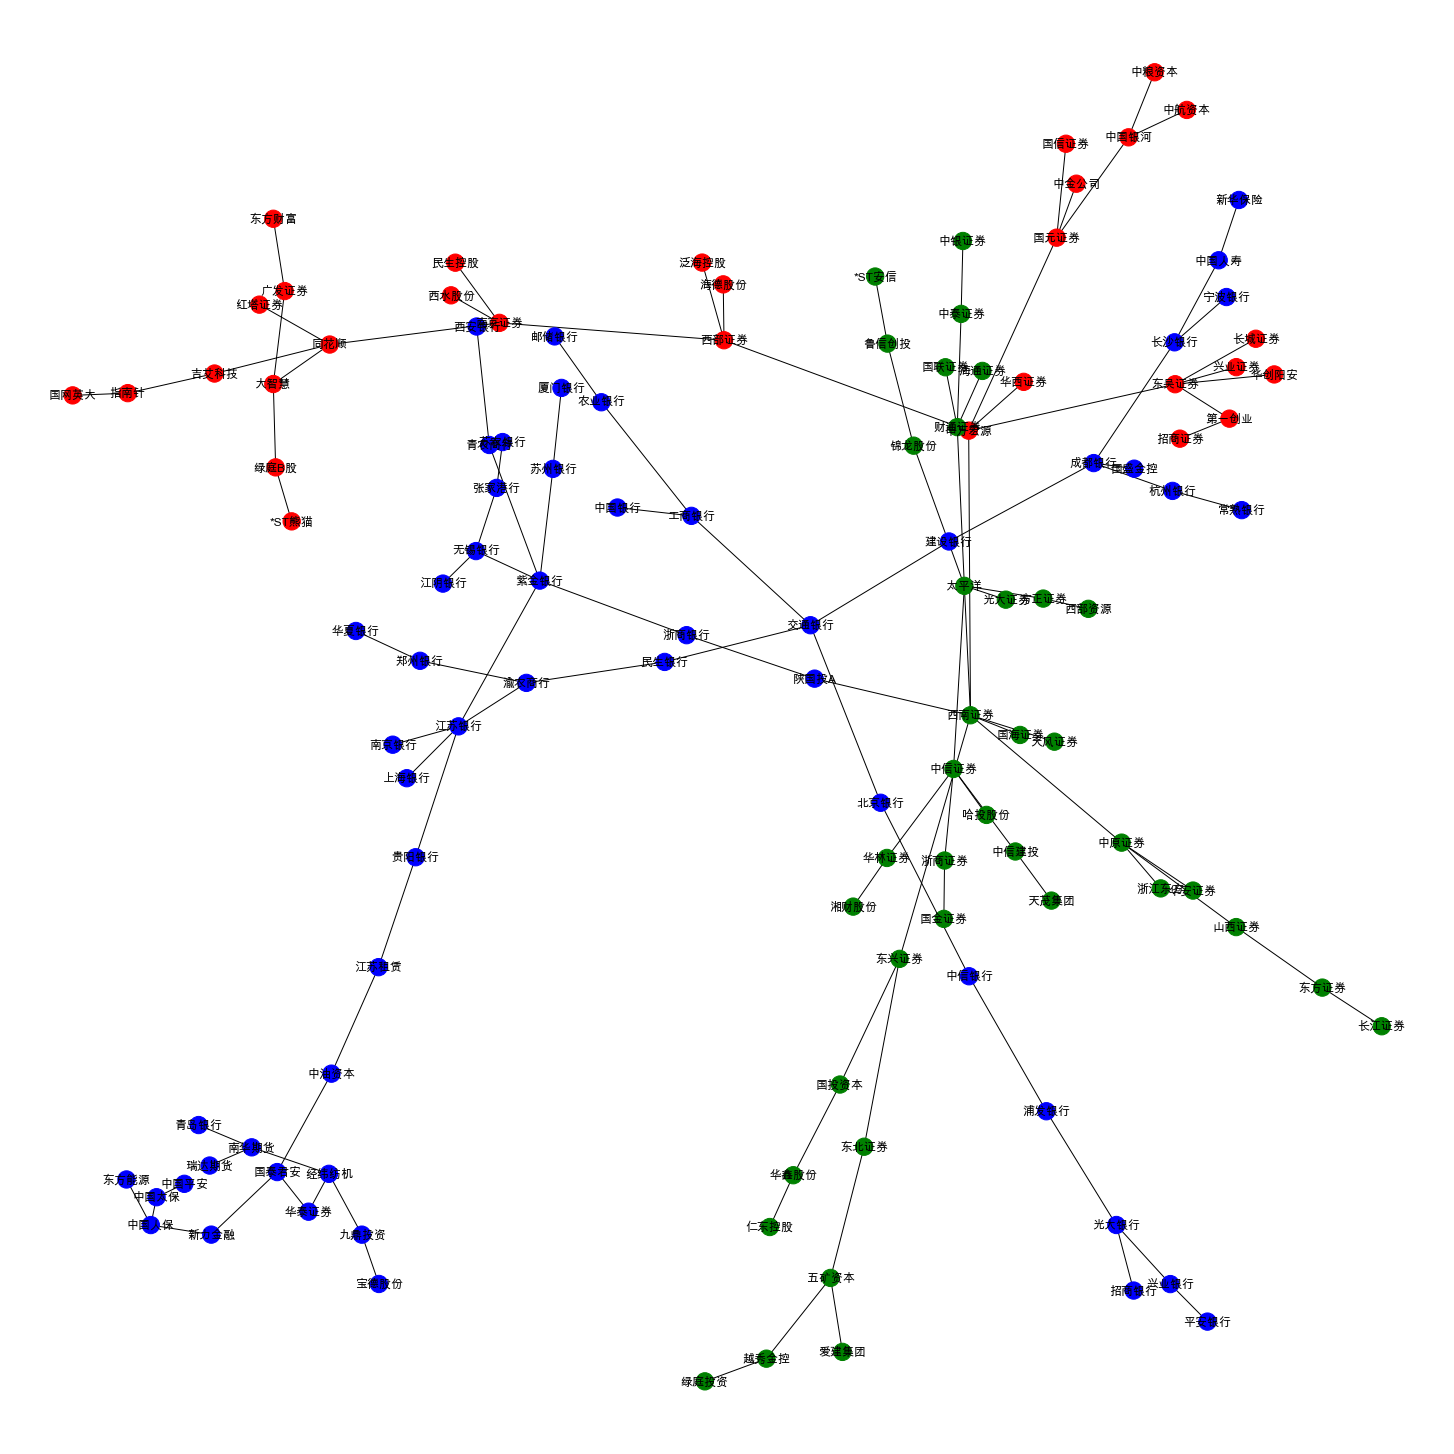

In [68]:
color_map = []
for node in mst:
    # print(node)
    if node in color_c[0]:
        color_map.append(color[0][0])
    elif node in color_c[1]:
        color_map.append(color[1][0])
    else:
        color_map.append(color[2][0])        
plt.figure(figsize=(20,20))
nx.draw_spring(mst,node_color = color_map,with_labels = True)

In [73]:
nx.write_gexf(mst,'mst_2020_11.gexf')